# Applied Statistics - Project

### By Joanne Feeney
***

Project created with the help of Github Co-Pilot:

https://github.com/features/copilot

Imports that will be used for this project.

In [37]:
# Imports
import math
import pandas as pd
import itertools
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

## Task 1:

Downloading and saving the dataset to my repository.

Reading in PlantGrowth R dataset.

In [20]:
# Load csv file
data=pd.read_csv("datasets\PlantGrowth.csv")

# Show
data.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Joanne Feeney\AppData\Local\Temp\ipykernel_9832\1163731148.py:2: SyntaxWarning: invalid escape sequence '\P'
  data=pd.read_csv("datasets\PlantGrowth.csv")


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


Link to dataset supplied byb lecturer however you will find a short description of it on Vicent Arel-Bundock's Rdatasets page.

*"Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall."*

https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html

## Task 2:

Describing the dataset.

The dataset contains results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. It contains two main variables, a treatment group and the weight of plants within those groups.

Describing the dataset

In [21]:
# Describe
data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


- The dataset has 30 cases & 2 variables

- The groups variables are ‘ctrl’, ‘trt1’, and ‘trt2’, representing the control and two different treatment conditions.

- The mean value is 15.5, which is the midpoint between the minimum and maximum values (1 & 30).

- The standard deviation is 8.8, indicating some variability in the values.

- The mean weight is 5.073, with a standard deviation of 0.701.

- The values range from a minimum of 3.59 to a maximum of 6.31.

## Task 3:

Describing what a t-test is, how it works, and what the assumptions are.

**What Is a T-Test?**

"A t-test is an inferential statistic used to determine if there is a significant difference between the means of two groups and how they are related. T-tests are used when the data sets follow a normal distribution and have unknown variances.

The t-test is a test used for hypothesis testing in statistics and uses the t-statistic, the t-distribution values and the degrees of freedom to determine statistical significance."

**How it works**

"A t-test compares the average values of two data sets and determines if they came from the same population. For example, the grades of students from a physics class and those of a different group of students from a writing class would not likely have the same mean and standard deviation."


**Assumptions**

"The following assumptions are made while using a t-test:

- The data collected must follow a continuous or ordinal scale.
- The data is collected from a randomly selected portion of the total population
- The data will result in a normal distribution of a bell-shaped curve."

[1] 

(Hayes, 2024)

## Task 4:

Performing a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Testing whether it follows normal distribution.

In [22]:
# Splitting data into groups
data.groupby("group").describe()

rownames                                                weight         \
         count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                         
ctrl      10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1      10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2      10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31

Creating variables for each group.

In [23]:
# Creating variable for each group
ctrl = data['weight'][data.group == 'ctrl']
trt1 = data['weight'][data.group == 'trt1']
trt2 = data['weight'][data.group == 'trt2']

Normality test for trt1 & trt2.

In [24]:
# Normality test on trt1
stats.shapiro(trt1)

ShapiroResult(statistic=0.9304106932921845, pvalue=0.45194395810927823)

In [25]:
# Normality test on trt2
stats.shapiro(trt2)

ShapiroResult(statistic=0.9410051970546394, pvalue=0.5642518926711526)

For the Shapiro Wilks test, the null hypothesis is that a p-value greater than 0.05 suggests that the data follows a normal distribution.

The results of the Shapiro-Wilk test are as follows:

**Group trt1:**

W-statistic: 0.9304

p-value: 0.452

**Group trt2:**

W-statistic: 0.9410

p-value: 0.564

Both p-values are significantly greater than 0.05, so we fail to reject the null hypothesis for both groups. 

Below are some boxplots, scatterplots & stripplots that help us visualize the data.

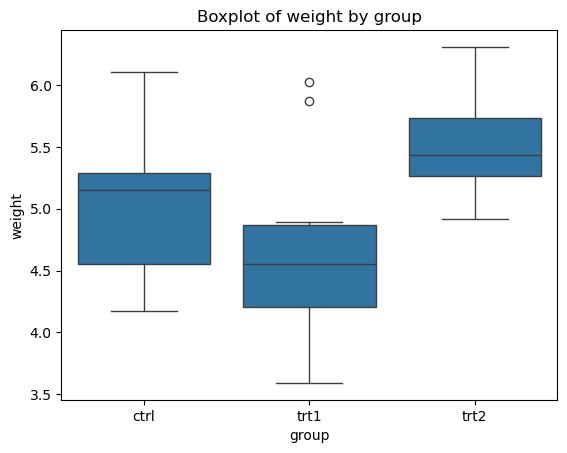

In [55]:
# Create a boxplot
sns.boxplot(x='group', y='weight', data=data)
plt.title('Boxplot of weight by group')
plt.show()

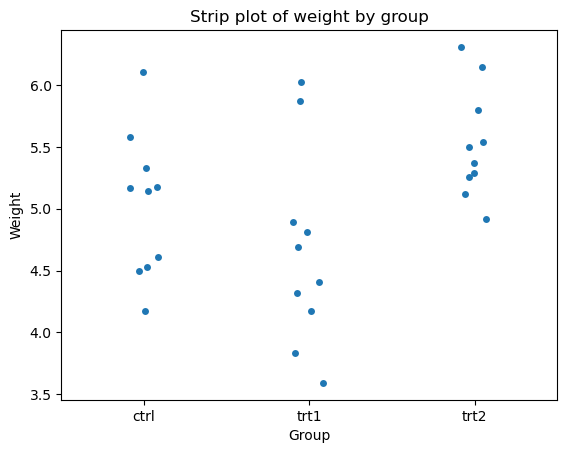

In [54]:
# Create a strip plot
sns.stripplot(data=data, x='group', y='weight', jitter=True)
plt.ylabel('Weight')
plt.xlabel('Group')
plt.title('Strip plot of weight by group')
plt.show()

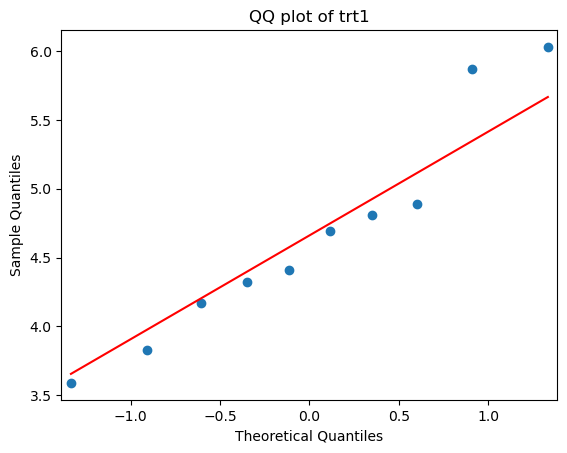

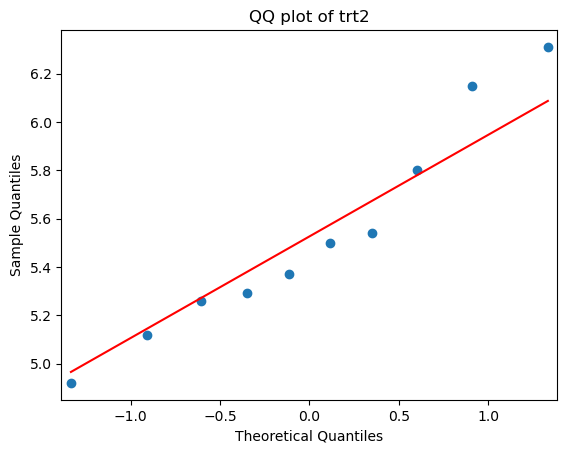

In [29]:
# QQ plot for trt1 & trt2
fig = sm.qqplot(trt1, line='s')
plt.title('QQ plot of trt1')
plt.show()

fig = sm.qqplot(trt2, line='s')
plt.title('QQ plot of trt2')
plt.show()

https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

t-test on this dataset.

In [ ]:
# Perform independant t-test
stats.ttest_ind(trt1, trt2)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

The probability of seeing a value as extreme as -3.01 is 0.007, which is below the cut off of 0.05.

As learned during lectures, the null hypothesis for an independant t-test is that the means of the two populations are the same.

Since the p-value is less than 0.05, I am rejecting the null hypothesis. This indicates a difference in the mean weights between the groups trt1 and trt2.

Calculating the t-statistic.

In [56]:
# Calculating the t-statistic
t_statistic, p_value = stats.ttest_ind(trt1, trt2)

# Show
t_statistic, p_value

(-3.0100985421243616, 0.0075184261182198574)

The t-statistic is giving the same results as above.

The probability of seeing a t-statistic value as extreme as -3.01 is 0.007 (1%).

## Task 5:

Performing ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

*"The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.*

*One-way ANOVA compares the means between groups and determines whether any of those means are statistically significantly different from each other.*

*If the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis, which is that there are at least two group means that are statistically significantly different from each other."*

[2] 

Laerdstatistics.com

ANOVA on this dataset 

In [57]:
# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(ctrl, trt1, trt2)

# Show
f_statistic, p_value

(4.846087862380136, 0.0159099583256229)

Results:

The F statistic = 4.84

The p-value = 0.015

The p-value is less than 0.05 so I am rejecting the null hypothesis. 

The results implies that there are significant differences between the means of the three groups.

## Task 6:

Explaining why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

*"Every time you conduct a t-test, there is a chance that you will make a Type I error. This error is usually 5%. By running two t-tests on the same data you will have increased your chance of "making a mistake" to 10%.*

*Three t-tests would be 15% (actually, 14.3%). These are unacceptable errors.*

*An ANOVA controls for these errors so that the Type I error remains at 5% and you can be more confident that any statistically significant result you find is not just running lots of tests."*

[3] 

Laerdstatistics.com

****

## Bibliography

[1] Hayes, A. (October 2024). *T-Test: What It Is With Multiple Formulas and When To Use Them*. Investopedia. Retrieved from [https://www.investopedia.com/terms/t/t-test.asp](https://www.investopedia.com/terms/t/t-test.asp) (last accessed December 8, 2024).

[2] Unknown. *One-way ANOVA*. Laerd Statistics. Retrieved from [https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) (last accessed December 14, 2024).

[3] Unknown. *One-way ANOVA (cont...)*. Laerd Statistics. Retrieved from [https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php) (last accessed December 14, 2024).